# Dimensionality Reduction

**Popular Techniques**

| Method                                                  | Description                                           | When to Use                      |
| ------------------------------------------------------- | ----------------------------------------------------- | -------------------------------- |
| **PCA (Principal Component Analysis)**                  | Linear projection that captures max variance          | Fast, interpretable              |
| **t-SNE (t-distributed Stochastic Neighbor Embedding)** | Non-linear, focuses on local structure                | Great for 2D visualization       |
| **UMAP (Uniform Manifold Approximation)**               | Non-linear, preserves both global and local structure | Fast + powerful for complex data |
| **Truncated SVD**                                       | Like PCA but works on sparse data                     | For text/vectorized features     |
| **Autoencoders**                                        | Neural networks that compress and reconstruct         | When using deep learning         |


| Benefit                    | Explanation                                           |
| -------------------------- | ----------------------------------------------------- |
| **Visualization**          | Reduce to 2D or 3D for plotting complex data          |
| **Noise reduction**        | Eliminate irrelevant or redundant features            |
| **Speed**                  | Lower computational cost in downstream models         |
| **Clustering performance** | Make distance-based clustering more meaningful        |
| **Combat overfitting**     | Helps generalization by removing unnecessary features |


## PCA (foundational, fast, and interpretable)


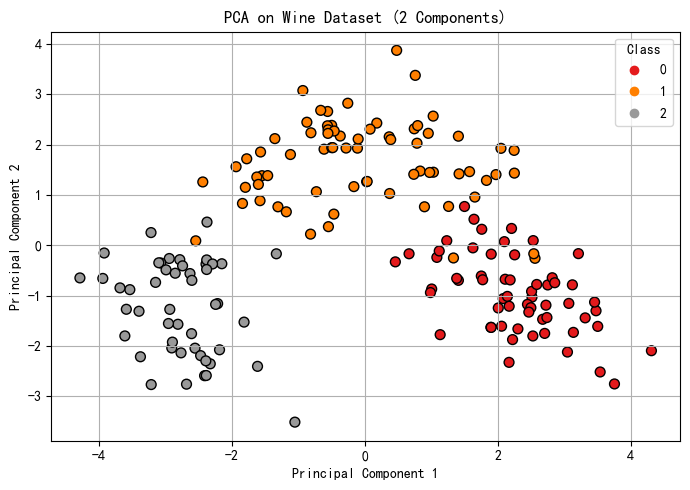

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load the Wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the 2D PCA result
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', s=50, edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Wine Dataset (2 Components)")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Class")
plt.tight_layout()
plt.show()


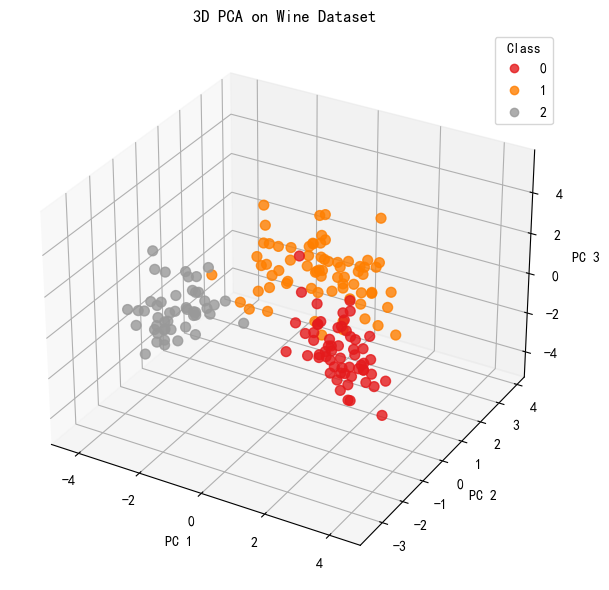

,PC,Explained Variance Ratio,Cumulative Variance
0,PC1,0.3620,0.3620
1,PC2,0.1921,0.5541
2,PC3,0.1112,0.6653


In [2]:
# 1. Variance explained by each PCA component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 2. Try PCA with 3 components for 3D plot
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 3. Plot 3D scatter
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=y, cmap='Set1', s=50, alpha=0.8)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("3D PCA on Wine Dataset")
fig.tight_layout()

plt.legend(*scatter.legend_elements(), title="Class")
plt.show()

# Return variance explanation info
pd.DataFrame({
    "PC": ["PC1", "PC2", "PC3"],
    "Explained Variance Ratio": pca_3d.explained_variance_ratio_.round(4),
    "Cumulative Variance": pca_3d.explained_variance_ratio_.cumsum().round(4)
})


<Figure size 1000x600 with 0 Axes>

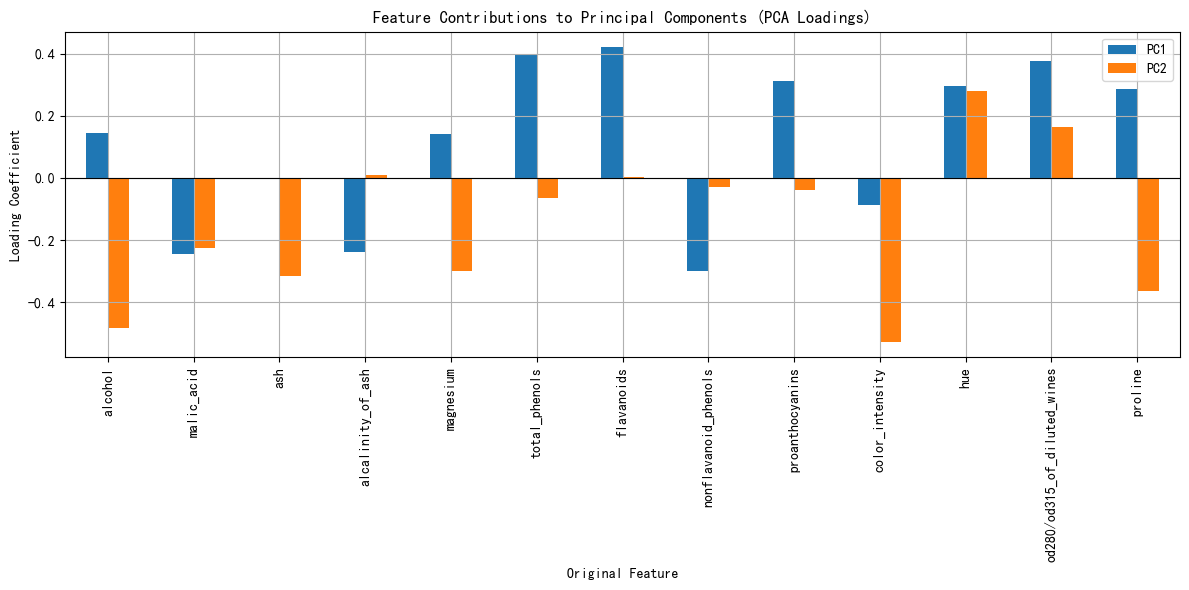

In [5]:
# Extract PCA loadings (components)
loadings = pd.DataFrame(pca.components_.T, 
                        columns=["PC1", "PC2"], 
                        index=data.feature_names)

# Plot feature contributions for PC1 and PC2
plt.figure(figsize=(10, 6))
loadings[["PC1", "PC2"]].plot(kind="bar", figsize=(12, 6))
plt.title("Feature Contributions to Principal Components (PCA Loadings)")
plt.ylabel("Loading Coefficient")
plt.xlabel("Original Feature")
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(True)
plt.tight_layout()
plt.show()


- A high absolute value (positive or negative) means the feature strongly influences that principal component.
- Direction (sign) doesn’t affect importance, but shows whether the feature moves "with" or "against" the component direction.
- For example:
    - If flavanoids has a large positive value in PC1, it’s a major driver of variation.

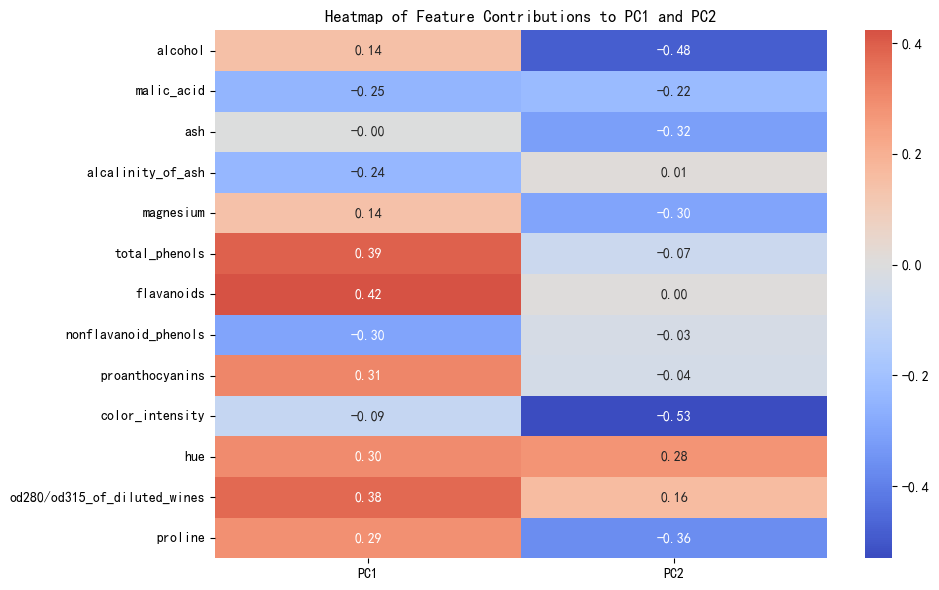

In [9]:
import seaborn as sns

# Create a heatmap of PCA loadings for PC1 and PC2
plt.figure(figsize=(10, 6))
sns.heatmap(loadings[["PC1", "PC2"]], annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Heatmap of Feature Contributions to PC1 and PC2")
plt.tight_layout()
plt.show()


In [7]:
# Sort and extract top 3 contributing features by absolute value for each component
top_features_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(3)
top_features_pc2 = loadings["PC2"].abs().sort_values(ascending=False).head(3)

# Combine with direction (sign)
top_pc1 = loadings.loc[top_features_pc1.index, "PC1"].round(3)
top_pc2 = loadings.loc[top_features_pc2.index, "PC2"].round(3)

top_pc1_df = pd.DataFrame({"Feature": top_pc1.index, "PC1 Loading": top_pc1.values})
top_pc2_df = pd.DataFrame({"Feature": top_pc2.index, "PC2 Loading": top_pc2.values})

top_pc1_df


,Feature,PC1 Loading
0,flavanoids,0.423
1,total_phenols,0.395
2,od280/od315_of_diluted_wines,0.376


In [8]:
top_pc2_df

,Feature,PC2 Loading
0,color_intensity,-0.530
1,alcohol,-0.484
2,proline,-0.365


| Quadrant               | Description                               |
| ---------------------- | ----------------------------------------- |
| **High PC1, Low PC2**  | High-quality, strong/dark wines           |
| **High PC1, High PC2** | High-quality but lighter/milder wines     |
| **Low PC1, Low PC2**   | Lower phenolics but intense color/alcohol |
| **Low PC1, High PC2**  | Weaker, possibly more diluted wines       |


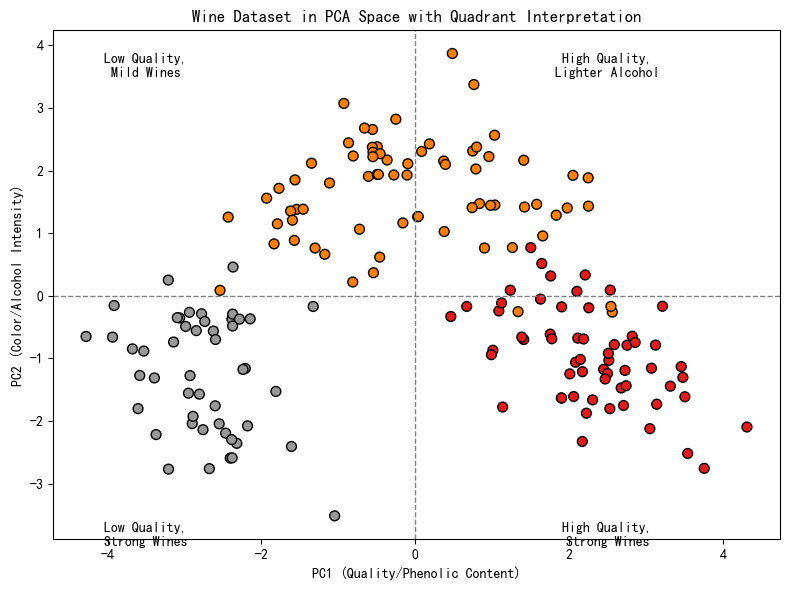

In [11]:
# Create PCA 2D plot with quadrant labels
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Set1', s=50, edgecolor='k')
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)

# Axis labels
plt.xlabel("PC1 (Quality/Phenolic Content)")
plt.ylabel("PC2 (Color/Alcohol Intensity)")
plt.title("Wine Dataset in PCA Space with Quadrant Interpretation")

# Quadrant annotations
plt.text(2.5, 3.5, "High Quality,\nLighter Alcohol", fontsize=10, ha='center')
plt.text(2.5, -4, "High Quality,\nStrong Wines", fontsize=10, ha='center')
plt.text(-3.5, 3.5, "Low Quality,\nMild Wines", fontsize=10, ha='center')
plt.text(-3.5, -4, "Low Quality,\nStrong Wines", fontsize=10, ha='center')

# plt.grid(True)

plt.tight_layout()
plt.show()


## t-SNE (for beautiful 2D visualizations)


- It’s a nonlinear dimensionality reduction algorithm used mainly for visualizing high-dimensional data in 2D or 3D.
- Place similar points close together in low-dimensional space, and dissimilar points far apart, while preserving local structure (neighborhoods).

| Feature                        | Description                                             |
| ------------------------------ | ------------------------------------------------------- |
| **Nonlinear**                  | Captures complex relationships not possible with PCA    |
| **Focuses on local structure** | Preserves neighbors, not global distances               |
| **Good for clustering**        | Makes natural groupings visually obvious                |
| **No inverse transform**       | You can’t recover the original features from the output |
| **Slow on large datasets**     | Needs careful tuning and subsetting                     |


| Domain             | Example                                                     |
| ------------------ | ----------------------------------------------------------- |
| NLP / text         | Visualize word or sentence embeddings                       |
| Image data         | Visualize CNN output or pixel-based features                |
| Bioinformatics     | Explore gene or cell expression data                        |
| General clustering | Visualize results of k-means, hierarchical clustering, etc. |


**PCA vs. t-SNE**
| Metric              | PCA                    | t-SNE                         |
| ------------------- | ---------------------- | ----------------------------- |
| Type                | Linear                 | Nonlinear                     |
| Structure preserved | Global (variance)      | Local (neighborhoods)         |
| Runtime             | Fast                   | Slower                        |
| Output dimensions   | Any                    | Usually 2 or 3 (for plotting) |
| Interpretability    | Easy (variance per PC) | Hard (no direct meaning)      |


/Users/bessie/learn-python/env/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/Users/bessie/learn-python/env/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/Users/bessie/learn-python/env/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/Users/bessie/learn-python/env/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


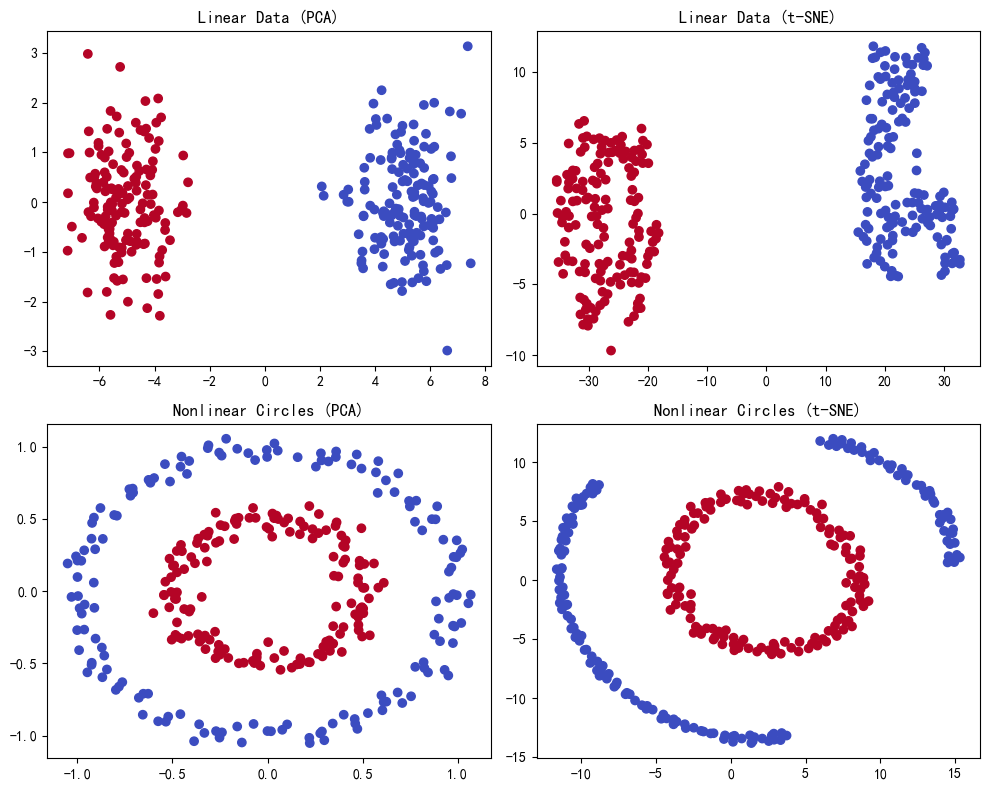

In [13]:
from sklearn.datasets import make_circles, make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create two datasets:
# - One linearly separable
# - One non-linearly separable (circles)
X_linear, y_linear = make_blobs(n_samples=300, centers=2, random_state=42)
X_nonlinear, y_nonlinear = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Apply PCA (linear method)
X_linear_pca = PCA(n_components=2).fit_transform(X_linear)
X_nonlinear_pca = PCA(n_components=2).fit_transform(X_nonlinear)

# Apply t-SNE (nonlinear method)
X_linear_tsne = TSNE(n_components=2, random_state=42, init='pca').fit_transform(X_linear)
X_nonlinear_tsne = TSNE(n_components=2, random_state=42, init='pca').fit_transform(X_nonlinear)

# Plot comparison
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(X_linear_pca[:, 0], X_linear_pca[:, 1], c=y_linear, cmap='coolwarm')
axs[0, 0].set_title("Linear Data (PCA)")

axs[0, 1].scatter(X_linear_tsne[:, 0], X_linear_tsne[:, 1], c=y_linear, cmap='coolwarm')
axs[0, 1].set_title("Linear Data (t-SNE)")

axs[1, 0].scatter(X_nonlinear_pca[:, 0], X_nonlinear_pca[:, 1], c=y_nonlinear, cmap='coolwarm')
axs[1, 0].set_title("Nonlinear Circles (PCA)")

axs[1, 1].scatter(X_nonlinear_tsne[:, 0], X_nonlinear_tsne[:, 1], c=y_nonlinear, cmap='coolwarm')
axs[1, 1].set_title("Nonlinear Circles (t-SNE)")

plt.tight_layout()
plt.show()


/Users/bessie/learn-python/env/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


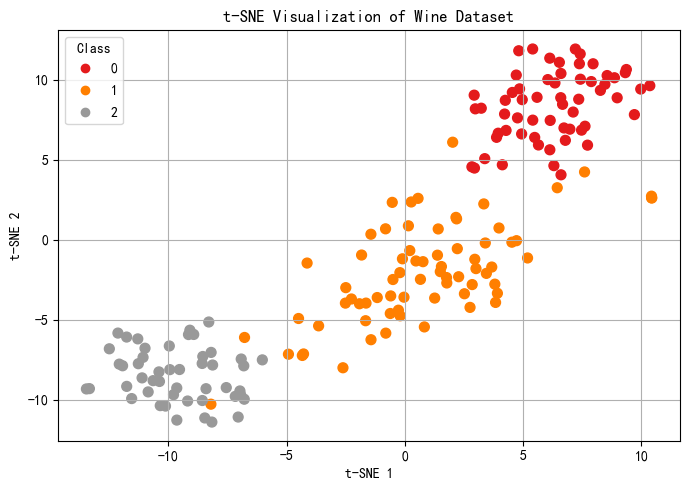

In [12]:
from sklearn.manifold import TSNE

# Apply t-SNE to the standardized data
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200, init='pca')
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE result
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Set1', s=50)
plt.title("t-SNE Visualization of Wine Dataset")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Class")
plt.tight_layout()
plt.show()


## UMAP (modern and scalable alternative to t-SNE)

## NMF